## Корреляция
#### Тест 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.sandbox.stats.multicomp import multipletests 

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv('illiteracy.txt', sep='\t')
df.head()

,Country,Illit,Births
0,Albania,20.5,1.78
1,Algeria,39.1,2.44
2,Bahrain,15.0,2.34
3,Belize,5.9,2.97
4,Benin,73.5,5.60


In [4]:
#4
df[['Illit', 'Births']].corr(method='pearson')

,Illit,Births
Illit,1.000000,0.768663
Births,0.768663,1.000000


In [5]:
#5
df[['Illit', 'Births']].corr(method='spearman')

,Illit,Births
Illit,1.000000,0.752962
Births,0.752962,1.000000


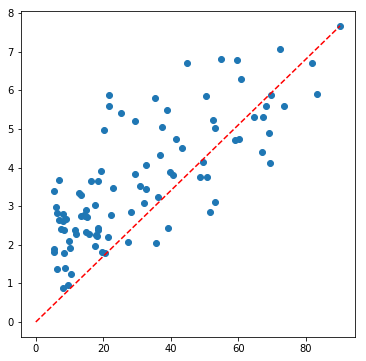

In [6]:
plt.figure(figsize=(6,6))
plt.scatter(df['Illit'], df['Births'])
plt.plot([0, max(df['Illit'])], [0, max(df['Births'])], ls='--', color='red')
plt.show()

#### Тест 2

In [7]:
df = pd.read_csv('water.txt', sep='\t')
df.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


In [8]:
def pearson_spearman_corr(x, y, kind='pearson&spearman'):
    
    assert(len(x) == len(y)), 'Length of arrays must be equal'
    
    if kind == 'pearson&spearman':
        corr_p, _ = stats.pearsonr(x, y)
        corr_s, _ = stats.spearmanr(x, y)
        return corr_p, corr_s
    elif kind == 'spearman':
        corr, _ = stats.spearmanr(x, y)
        return corr
    elif kind == 'pearson':
        corr, _ = stats.pearsonr(x, y)
        return corr
    else:
        raise ValueError('Function can compute only pearson, spearman or pearson&spearman corr')
def matthews_corr(a, b, c, d):
    """a - where 0 in both sample
       d - where 1 in both sample
       c - 1 in 1-st sample and 0 in 2-d
       b - 0 in 1-st sample and 1 in 2-d
    """
    numerator = a*d - b*c
    denominator = np.sqrt((a+b)*(a+c)*(b+d)*(c+d))
    return numerator / denominator

def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - stats.norm.cdf(z_stat)

def proportions_diff_z_stat_ind(n1=None, n2=None, cnt_pos1=None, cnt_pos2=None,
                                p1=None, p2=None, sample1=None, sample2=None):
    if sample1 != None:
        n1 = len(sample1)
        cnt_pos1 = sum(sample1)
        #подсчет вероятноти для 1-й популяции
        p1 = cnt_pos1 / n1
    elif n1 != None and cnt_pos1 != None:
        p1 = cnt_pos1 / n1
    else:
        assert(n1 != None) , 'You give no sample, no cnt_pos1, so it must be p1 and n1'
        
    if sample2 != None:
        n2 = len(sample2)
        cnt_pos2 = sum(sample2)
        #подсчет вероятноти для 2-й популяции
        p2 = cnt_pos2 / n2
    elif n2 != None and cnt_pos2 != None:
        p2 = cnt_pos2 / n2
    else:
        assert(n1 != None) , 'You give no sample, no cnt_pos1, so it must be p1 and n1'
        
    P = (p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

def proportions_diff_confint_ind(n1=None, n2=None, cnt_pos1=None, cnt_pos2=None,
                                 p1=None, p2=None, sample1=None, sample2=None, alpha = 0.05):
    
    z = stats.norm.ppf(1 - alpha / 2.)
    
    if sample1 != None:
        n1 = len(sample1)
        cnt_pos1 = sum(sample1)
        #подсчет вероятноти для 1-й популяции
        p1 = cnt_pos1 / n1
    elif n1 != None and cnt_pos1 != None:
        p1 = cnt_pos1 / n1
    else:
        assert(n1 != None) , 'You give no sample, no cnt_pos1, so it must be p1 and n1'
        
    if sample2 != None:
        n2 = len(sample2)
        cnt_pos2 = sum(sample2)
        #подсчет вероятноти для 2-й популяции
        p2 = cnt_pos2 / n2
    elif n2 != None and cnt_pos2 != None:
        p2 = cnt_pos2 / n2
    else:
        assert(n1 != None) , 'You give no sample, no cnt_pos1, so it must be p1 and n1'
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ n1 + p2 * (1 - p2)/ n2)
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ n1 + p2 * (1 - p2)/ n2)
    
    return (left_boundary, right_boundary)

In [9]:
#1, 2
corr_p, corr_s = pearson_spearman_corr(df['mortality'], df['hardness'], kind='pearson&spearman')
print('Pearson corr: {0}\nSpearman corr: {1}'.format(corr_p, corr_s))

Pearson corr: -0.6548486232042465
Spearman corr: -0.6316646189166502


In [10]:
#3
south = df[df['location']=='South']
north = df[df['location']=='North']
r_south = pearson_spearman_corr(south['mortality'], south['hardness'], kind='pearson')
r_north = pearson_spearman_corr(north['mortality'], north['hardness'], kind='pearson')
print('Corr pearson in south: {0}\nCorr pearson in north: {1}'.format(r_south, r_north))

Corr pearson in south: -0.6021532715484158
Corr pearson in north: -0.3685978383288718


In [11]:
#4
#Среди респондентов General Social Survey 2014 года хотя бы раз в месяц проводят вечер в баре 203 женщины
#и 239 мужчин; реже, чем раз в месяц, это делают 718 женщин и 515 мужчин.
matthews_corr(239, 515, 203, 718)

0.10900237458678963

In [12]:
#5 проверка, значимо ли коэффициент корреляции Мэтьюса отличается от нуля 
stats.chi2_contingency([[239, 515], [203, 718]])

(19.40753078854304,
 1.0558987006638725e-05,
 1,
 array([[198.96597015, 555.03402985],
        [243.03402985, 677.96597015]]))

In [13]:
#5 если по формулам из лекции явно выписать статистику, то вот так:
n = np.sum([239, 515, 203, 718])
stat = n*(matthews_corr(239, 515, 203, 718))**2
print(stat)
print(2*(1-stats.chi2.cdf(abs(stat), df=1)))

19.90154208981099
nan


In [153]:
#6
p_man = 239 / (239 + 515)
p_woman = 203 / (203 + 718)
proportions_diff_confint_ind(p2=p_woman, p1=p_man, n2=203+718, n1=239+515)

(0.053905233215813156, 0.13922183141523897)

In [154]:
#7
z_stat = proportions_diff_z_stat_ind(p2=p_woman, p1=p_man, n2=203+718, n1=239+515)
proportions_diff_z_test(z_stat)

8.153453089576601e-06

In [155]:
#8, 9
stats.chi2_contingency([[197, 111, 33], [382, 685, 331], [110,342,333]])

(293.68311039689746,
 2.4964299580093467e-62,
 4,
 array([[ 93.08597464, 153.74722662,  94.16679873],
        [381.6251981 , 630.318542  , 386.0562599 ],
        [214.28882726, 353.93423138, 216.77694136]]))

In [14]:
#10
#Корреляция V Крамера
stat, *a = stats.chi2_contingency([[197, 111, 33], [382, 685, 331], [110,342,333]])
n = np.sum([[197, 111, 33], [382, 685, 331], [110,342,333]])
np.sqrt(stat/(n * (min(3,3)-1)))

0.2412013934500338

## Множественная проверка гипотез
#### Тест 2
(Тест 1 не предполагает каких-либо вычислений)

In [2]:
df = pd.read_csv('AUCs.txt', sep='\t', index_col=0)
df.head()

,C4.5,C4.5+m,C4.5+cf,C4.5+m+cf
adult (sample),0.763,0.768,0.771,0.798
breast cancer,0.599,0.591,0.590,0.569
breast cancer wisconsin,0.954,0.971,0.968,0.967
cmc,0.628,0.661,0.654,0.657
ionosphere,0.882,0.888,0.886,0.898


In [3]:
#2
matrix = np.zeros((4 , 4))
for i in range(df.shape[1]):
    for j in range(i + 1, df.shape[1]):
        _, p = stats.wilcoxon(df.iloc[:, i], df.iloc[:, j])
        matrix[i, j] = p
matrix

array([[0.        , 0.01075713, 0.86126233, 0.01590644],
       [0.        , 0.        , 0.04633273, 0.32782568],
       [0.        , 0.        , 0.        , 0.0229091 ],
       [0.        , 0.        , 0.        , 0.        ]])

In [4]:
#3
len(np.where((matrix < 0.05) & (matrix != 0))[0])

4

In [160]:
#5
multipletests(matrix[np.where(matrix > 0)], alpha = 0.05, method = 'holm')

(array([False, False, False, False, False, False]),
 array([0.0645428 , 0.86126233, 0.07953222, 0.13899819, 0.65565135,
        0.0916364 ]),
 0.008512444610847103,
 0.008333333333333333)

In [161]:
#6
multipletests(matrix[np.where(matrix > 0)], alpha = 0.05, method = 'fdr_bh')

(array([ True, False,  True, False, False,  True]),
 array([0.0458182 , 0.86126233, 0.0458182 , 0.06949909, 0.39339081,
        0.0458182 ]),
 0.008512444610847103,
 0.008333333333333333)

In [162]:
#1 все
#2 C4.5, C4.5+m
#3 3
#4 m
#5 0
#6 3
#7 некорректно
#8 больше датасетов

## Регрессия

In [39]:
df = pd.read_csv('botswana.tsv', sep='\t')
df.head()

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,evermarr,agefm,heduc,urban,electric,radio,tv,bicycle
0,0,18,10,catholic,4.0,1.0,1.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
1,2,43,11,protestant,2.0,1.0,1.0,1,20.0,14.0,1,1.0,1.0,1.0,1.0
2,0,49,4,spirit,4.0,1.0,0.0,1,22.0,1.0,1,1.0,1.0,0.0,0.0
3,0,24,12,other,2.0,1.0,0.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
4,3,32,13,other,3.0,1.0,1.0,1,24.0,12.0,1,1.0,1.0,1.0,1.0


In [40]:
#1
len(df['religion'].unique())

4

In [41]:
#2
df.dropna(axis=0, how='any').shape[0]

1834

In [42]:
df_copy = df.copy()

In [43]:
#3
df = df_copy.copy()
df['nevermarr'] = np.where(np.isnan(df['agefm']), 1, 0)
df = df.drop(['evermarr'], axis=1)
df['agefm'].fillna(0, inplace=True)

#df.loc[(data['nevermarr']==1) & (df['heduc'].isnull()),'heduc'] = -1
df['heduc'] = np.where((df['nevermarr']==1) & (np.isnan(df['heduc'])), -1, df['heduc'])
df['heduc'].isna().sum()

123

In [44]:
#4
df['idlnchld_noans'] = np.where(np.isnan(df['idlnchld']), 1, 0)
df['heduc_noans'] = np.where(np.isnan(df['heduc']), 1, 0)
df['usemeth_noans'] = np.where(np.isnan(df['usemeth']), 1, 0)
df['idlnchld'].fillna(-1, inplace=True)
df['heduc'].fillna(-2, inplace=True)
df['usemeth'].fillna(-1, inplace=True)
print(df.columns[df.isna().any()].tolist())

['knowmeth', 'electric', 'radio', 'tv', 'bicycle']


In [45]:
df = df.dropna(subset=['knowmeth', 'electric', 'radio', 'tv', 'bicycle'])
df.head(2)

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,agefm,heduc,urban,electric,radio,tv,bicycle,nevermarr,idlnchld_noans,heduc_noans,usemeth_noans
0,0,18,10,catholic,4.0,1.0,1.0,0.0,-1.0,1,1.0,1.0,1.0,1.0,1,0,0,0
1,2,43,11,protestant,2.0,1.0,1.0,20.0,14.0,1,1.0,1.0,1.0,1.0,0,0,0,0


In [46]:
df.shape[0]*df.shape[1]

78264

In [47]:
#5, 6
import statsmodels.formula.api as smf

In [48]:
feats = feats = ' + '.join(df.drop(['ceb'],axis=1).columns)
print(feats)
    
m1 = smf.ols('ceb ~ ' + feats, data=df)
fitted = m1.fit()
print(fitted.summary())

age + educ + religion + idlnchld + knowmeth + usemeth + agefm + heduc + urban + electric + radio + tv + bicycle + nevermarr + idlnchld_noans + heduc_noans + usemeth_noans
                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     412.5
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        22:53:46   Log-Likelihood:                -7732.1
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4328   BIC:                         1.563e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    st

In [49]:
#7
import statsmodels.stats.api as sms
print(f'Breusch-Pagan test: {sms.het_breuschpagan(fitted.resid, fitted.model.exog)[1]}')

Breusch-Pagan test: 1.1452927633439797e-225


In [50]:
#8
df = df.drop(['religion', 'radio', 'tv'], axis=1)

In [51]:
feats = feats = ' + '.join(df.drop(['ceb'],axis=1).columns)

In [52]:
m2 = smf.ols('ceb ~ ' + feats , data=df)

fitted = m2.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     559.5
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        22:53:50   Log-Likelihood:                -7734.5
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4333   BIC:                         1.559e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.0698      0.198     -5.

In [53]:
print(f'Breusch-Pagan test: {sms.het_breuschpagan(fitted.resid, fitted.model.exog)[1]}')

Breusch-Pagan test: 1.119745889653916e-228


In [54]:
m3 = smf.ols('ceb ~ ' + feats , data=df)

fitted = m3.fit(cov_type='HC1')
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     463.4
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        22:53:53   Log-Likelihood:                -7734.5
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4333   BIC:                         1.559e+04
Df Model:                          14                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.0698      0.258     -4.

In [66]:
F, p, k1 = m1.fit().compare_f_test(m3.fit())
print(f'F = {F}, p = {p}, k1 = {k1}')

F = 0.9192357784628133, p = 0.46723055472768693, k1 = 5.0


In [65]:
#9
df = df.drop(['usemeth', 'usemeth_noans'], axis=1)
feats = feats = ' + '.join(df.drop(['ceb'],axis=1).columns)

m4 = smf.ols('ceb ~ ' + feats , data=df)
fitted = m4.fit(cov_type='HC1')
F, p, k1 = m3.fit().compare_f_test(m4.fit())
print(f'F = {F}, p = {p}, k1 = {k1}')
#p-val оч мало, признаки надо вернуть, то есть финальная модель похоже, что m3
#в 10 задаче ответы выбирал по m3 - все ок

F = 92.89058230109622, p = 3.1552009480426394e-40, k1 = 2.0
